In [1]:
import numpy as np
np.set_printoptions(precision=3)
np.random.seed(20221110)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import scipy.stats as stats


# Estimation

Let's start with an example.

## The Old faithfull gayser in Yellowstone NP

https://www.yellowstonepark.com/things-to-do/geysers-hot-springs/about-old-faithful/


<img src="Old-Faithful-Aerial_NPSJimPeaco_2400.jpg" alt="OF" width="600"/>

Why is it called that?

The question: How faithful is The Old faithful? 

Times between two erruptions:

Years 1948 - 1952: $n=9340$ observations, $\bar{x}_1=63.3 min$.

Years 1983 - 1987: $n=22111$ observations, $\bar{x}_2=72.1 min$.

Fro historical data, let's say that we know that the population standard deviations at those times were:

$\sigma_1=9.17min$ 

and

$\sigma_2=12.67min$


The question we want to ask, has the time between two eruptions changed?

We want to have 99% confidence level in our answer.

In other words, is $\mu_1<\mu_2$, with confidence level $CL=99\%$?

([], [])

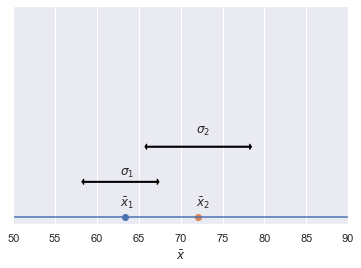

In [41]:
x=np.linspace(50,90,1000)
y=np.zeros(1000)
fig=plt.plot(x,y)
plt.scatter(63.3,0)
plt.text(62.8,0.015,r'$\bar{x}_1$')
plt.scatter(72.1,0)
plt.text(71.8,0.015,r'$\bar{x}_2$')
plt.xlim([50,90])
plt.ylim([-0.01,0.3])
plt.arrow(62.8-9.17/2.0,0.05,9.17,0.0,
          shape="full",
          color="black",
          length_includes_head=True, 
          head_width=0.008,
          head_length=0.2)

plt.arrow(62.8+9.17/2.0,0.05,-9.17,0.0,
          shape="full",
          color="black",
          length_includes_head=True, 
          head_width=0.008,
          head_length=0.2)
plt.text(62.8,0.06,r'$\sigma_1$')
         
plt.arrow(72.1-12.67/2.0,0.1,12.67,0.0,
          shape="full",
          color="black",
          length_includes_head=True, 
          head_width=0.008,
          head_length=0.2)

plt.arrow(72.1+12.67/2.0,0.1,-12.7,0.0,
          shape="full",
          color="black",
          length_includes_head=True, 
          head_width=0.008,
          head_length=0.2)
plt.text(71.8,0.12,r'$\sigma_2$')
         
plt.xlabel(r'$\bar{x}$')
plt.yticks([])


What do we know? 

We have sample means $\bar{x}_1$ from a sample of size $n_1$ 

and 

$\bar{x}_2$ from a sample of size $n_2$. 

But, we also know the $\bf{populations'}$ $\sigma_1$ and $\sigma_2$. 

The question is: are the two populations different? 

Or, is $\mu_1 \neq\mu_2$.

But, the question can be, has the time between eruptions changet to a higher value?

Or, is $\mu_1 <\mu_2$.

These are two different questions. 

Let's start with a simpler question. Let's estimate $\mu$ from a sample, if we know $\sigma$.

We have to set some assumptions about the random variable $x$ and the sample.

 1. Simple random sample of $n$ drawn values.
 2. $\sigma$ of the population is known.
 3. If the distribution of $x$ is normal, any $n$ is fine to assume normal distribution of $\bar{x}$.
 4. If the distribution of $x$ is not normal, $n\geq30$ is OK to assume normal distribution of $\bar{x}$ ($n\geq30$ if we think the distribution is very skewed).
 
 ## Point estimate
  
The mean of a sample of $n$ is called Point estimate or single value estimate $\bar{x}$ of $\mu$.

The value of $|\bar{x}-\mu|$ is called $\bf{Margin\ of\ error}$.

What is the probability that this point estimate is correct? 

Recall the probability to obtain a single point value of a continuous variable: 

$P(a)=\int_a^a f(x)dx=?$ --it's 0!


## Confidence level

Let's calculate the $z$ score (variable, transform).

$z=\frac{x-\mu}{\sigma}$

Confidence level $C$ is the probability that $x$ is in an interval so that

$P(-z_c<z<z_c)=C$

In other words, it is the probability that if we draw a value of $x$ at random, we will get a result for $z$ that is in this interval. 

$z_c$ is called a critical value for confidence $C$. 


Let's look at an example with the Normal distribution. (The population distribution can be other than normal.)

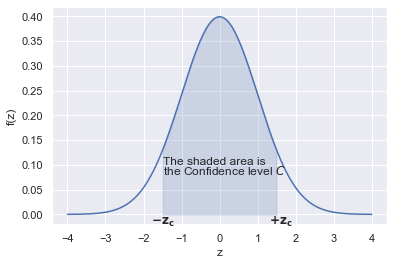

In [63]:
#How about 2\sigma?
x=np.linspace(-4,4,1000)
std_normal_pdf=stats.norm.pdf(x)

fig=plt.plot(x,std_normal_pdf)
plt.xlabel("z")
plt.ylabel("f(z)")

t = np.arange(-4,4,1/40)
plt.fill_between(
        x= x, 
        y1= std_normal_pdf, 
        where= (-1.5 < x)&(x < 1.5),
        color= "b",
        alpha= 0.2)
        

plt.text(-1.5,0.1,r'The shaded area is')
plt.text(-1.5,0.08,r'the Confidence level $C$')
plt.text(-1.8,-0.02,r'$\bf{-z_c}$')
plt.text(1.3,-0.02,r'$\bf{+z_c}$')

plt.show()

## How to find the interval give a confidence level?

In [12]:
#Use the interval method of the distributions
print("Critical values interval for 68% confidence is", stats.norm.interval(0.68, loc=0, scale=1))
#Why loc and scale? What is this distribution?

print("Critical values interval for 95.5% confidence is", stats.norm.interval(0.955, loc=0, scale=1))

print("Critical values interval for 99.8% confidence is", stats.norm.interval(0.998, loc=0, scale=1))

Critical values interval for 68% confidence is (-0.994457883209753, 0.9944578832097535)
Critical values interval for 95.5% confidence is (-2.004654461765096, 2.0046544617650968)
Critical values interval for 99.8% confidence is (-3.090232306167813, 3.090232306167813)


In [14]:
#Recall the difference of the integrals (of the cumulative distribution)) 
print("Integral between -1 and 1 is",stats.norm.cdf(1)-stats.norm.cdf(-1))
print("Integral between -2 and 2 is",stats.norm.cdf(2)-stats.norm.cdf(-2))
print("Integral between -3 and 3 is",stats.norm.cdf(3)-stats.norm.cdf(-3))

Integral between -1 and 1 is 0.6826894921370859
Integral between -2 and 2 is 0.9544997361036416
Integral between -3 and 3 is 0.9973002039367398


## What are these intervals for this distribution? (What is the distribution?)

## The case when we estimate the confidence level for the sample mean

We know that the distribution of $\bar{x}$ is Normal, with a mean same as the population mean $\mu$. 

We know that the standard deviation of the normal distribution of $\bar{x}$ is:

$\sigma_{\bar{x}}=\frac{\sigma}{\sqrt{n}}$

where $\sigma$ is the standard deviation of the population and $n$ is the sample size.

So the $z$-score for $\bar{x}$ is:

$z=\frac{\bar{x}-\mu}{\frac{\sigma}{\sqrt{n}}}$

For a confidence level $C$ we have:

$P(-z_c<z<z_c)=C$

or 

$P(-z_c\frac{\sigma}{\sqrt{n}}<\bar{x}-\mu<z_c\frac{\sigma}{\sqrt{n}})=C$

or:

$P(\bar{x}-z_c\frac{\sigma}{\sqrt{n}}<\mu<\bar{x}+z_c\frac{\sigma}{\sqrt{n}})=C$


The Marging of error is:

$E=z_c\frac{\sigma}{\sqrt{n}}$

The result of our estimation of $\mu$ by sampling therefore is:

$P(\bar{x}-E<\mu<\bar{x}+E)=C$

or:

$\mu=\bar{x}\pm E$

at confidence level $C$. 

Or the best is to say:

$\mu=\bar{x}\pm z_c\frac{\sigma}{\sqrt{n}}$

where $\bar{x}$ is the sample mean, 

$n$ is the sample size, 

$\sigma$ is the standard deviation of the population, 

and $z_c$ is the critical value for the confidence level $C$ in the Standard normal distribution. 

We speak about a $C$ confidence interval for $\mu$. 

$C$ is the probability to create an interval containing $\mu$ when sampling. 

or:

$C$ is the probability that the interval $(\bar{x}-E,\bar{x}+E)$ contains $\mu$.

Rule for rounding $E$: same number of decimal places as the standard deviation. 

In [70]:
#let's calculate the 99% confidence intervals for the Old faithful example.
n1=9340
x_bar_1=63.3
sigma_1=9.17
z_99=stats.norm.interval(0.99)
E_1=z_99[1]*sigma_1/np.sqrt(n1)


n2=22111
x_bar_2=72.1
sigma_2=12.67
z_99=stats.norm.interval(0.99)
E_2=z_99[1]*sigma_2/np.sqrt(n2)


from IPython.display import display, Markdown

display(Markdown(rf"""The estimate for the mean time between erruptions from 1948-1952 is ${"{:.2f}".format(x_bar_1)} \pm  {"{:.2f}".format(E_1)}$ min."""))

display(Markdown(rf"""The estimate for the mean time between erruptions from 1983-1987 is ${"{:.2f}".format(x_bar_2)} \pm  {"{:.2f}".format(E_2)}$ min."""))

The estimate for the mean time between erruptions from 1948-1952 is $63.30 \pm  0.24$ min.

The estimate for the mean time between erruptions from 1983-1987 is $72.10 \pm  0.22$ min.

From https://www.nps.gov/yell/planyourvisit/exploreoldfaithful.htm

Since its formal discovery in 1870, Old Faithful has been one of the more predictable geysers. Over time, the average interval between eruptions has increased, in part due to ongoing processes within its plumbing. Changes also result from earthquakes. Prior to the Hebgen Lake Earthquake (1959), the interval between Old Faithful’s eruptions averaged more than one hour. After the earthquake, it started erupting with two distinct intervals—a short and a long one. Its average interval increased. After the 1983 Borah Peak Earthquake, centered in Idaho, it increased again. In 1998, an earthquake near Old Faithful lengthened the interval again; subsequent earthquake swarms further increased intervals. Sometimes the average interval decreases.

## Sample size estimation

We can ask a related question:

What should be the sample size $n$, if we want to estimate $\mu$ within a margin of error $E$, with confidence $C$?

Recall:

$E=z_c\frac{\sigma}{\sqrt{n}}$

so:

$n=(\frac{z_c\sigma}{E})^2$

Example:

Mean weight of caught salmon in Alaska.

Let's assume that we know the standard deviation of the weight of salmon is $\sigma=2.15$ Lb.

We want to estimate the mean salmon weight in Alaska withing a margin of error of $E=0.2$ Lb and with confidence of $C=99\%$.

In [69]:
E=0.2
sigma=2.15
C=0.99

#We know z_99
z_99=stats.norm.interval(0.99)

#so

n=(z_99[1]*sigma/E)**2

print("The sample size to estimate the mean salmon weight is","{:.0f}".format(n),'.')

The sample size to estimate the mean salmon weight is 767 .
